# Logistic Regression

During Activate you were introduced to Logistic Regression as a classification model.

In [1]:
# Metadata is always important. It helps give you the context of the data.
# https://www.kaggle.com/datasets/yashgpt/us-college-data

<p style=font-size:24pt>$p(x)$ = $\frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}$</p> 

%latex
\begin{align}
\mathrm{log(odds)} = \beta_0 + \beta_1 x \\ 
\mathrm{odds} = e^{\beta_0} e^{\beta_1 x} 
\end{align}

%latex
\begin{equation}
\frac{p(x)}{1 - p(x)} = \mathrm{odds}
\end{equation}

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import exp 

# The below code should be used with caution. It will suppress all warnings in the notebook.
# It should only be added once your notebook is complete and you are willing to accept the risk of not seeing any warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
college_clean = pd.read_csv('college_clean.csv')
college_clean.sample(10)

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Passed_Inspection
33,Baker University,Yes,602,483,206,21,47,958,466,8620,4100,400,2250,58,68,11.0,21,6136,65,False
603,University of Arkansas at Fayetteville,No,3235,3108,2133,25,65,9978,1530,5028,3300,500,2000,73,89,14.8,10,6820,39,False
357,McPherson College,Yes,420,293,93,11,32,336,80,7950,3750,600,2740,54,54,9.8,45,9754,48,False
139,Colorado College,Yes,3207,1577,490,56,87,1892,7,17142,4190,450,1200,85,97,11.3,51,14664,84,True
691,University of Vermont,No,7663,6008,1735,18,51,7353,1674,15516,4928,500,990,87,90,9.9,10,12646,79,True
380,Montana College of Mineral Sci. & Tech.,No,572,544,320,45,72,1470,416,6073,3400,550,1400,71,71,16.4,31,6112,74,True
572,SUNY College at Purchase,No,2119,1264,390,5,33,2478,1441,6550,4760,1125,1362,80,100,14.9,8,8170,46,False
742,Western Michigan University,No,9167,7191,2738,24,53,15739,4278,6940,4100,500,1700,80,84,24.7,11,5983,55,False
118,Clinch Valley Coll. of the Univ. of Virginia,No,689,561,250,15,30,1125,422,7168,3689,600,1900,67,67,18.1,9,4417,46,False
210,Freed-Hardeman University,Yes,895,548,314,20,54,1174,50,5500,3340,600,1600,68,76,16.1,13,6078,62,False


In [4]:
# I have included an extra column called "Passed_Inspection"
# This is a binary variable that is 
# True (i.e. 1) if the college passed the inspection
# and False (i.e. 0) if the college failed the inspection.

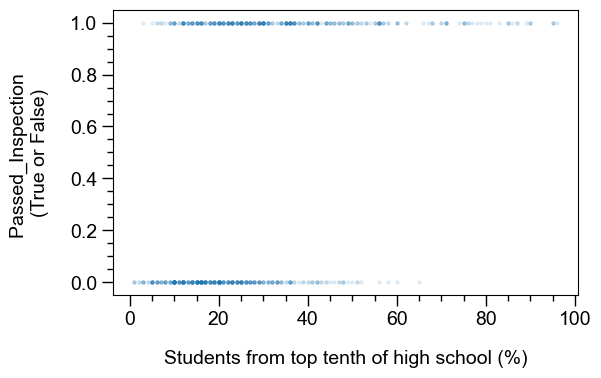

In [5]:
df_to_plot = college_clean.copy()#.sample(100)
X = df_to_plot[['Top10perc']]
y = df_to_plot.Passed_Inspection

plt.scatter(X, y, s=5, alpha=0.1)
plt.xlabel('Students from top tenth of high school (%)')
plt.ylabel('Passed_Inspection \n(True or False)')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

X = college_clean[['Top10perc']]
y = college_clean.Passed_Inspection

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.8, random_state=100)
# Notice the additional argument, stratify=y; this is to ensure that both sets have the same proportion of target labels.
# For example, if 80% of the data is 0, then 80% of the train set should be 0, and 80% of the test set should be 0.

In [7]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

## Interpret the model

Like with linear regression we can examine the intercept and coefficient of the model:

In [8]:
beta0 = logreg.intercept_[0]
beta0

-1.662756276019323

This is the log of the odds of a college passing the inspection if zero percent of the college's students came from the top tenth of their high school classes.

If we want to wrap our heads around what it means, we need to do some maths to convert it into a probability.

In [9]:
def convert_to_probability(odds):
    ''' 
    We are simply rearranging this equation (which is the definition of odds): 
    odds = probability / (1 - probability 
    '''
    probability = odds/(1+odds)
    return probability

In [10]:
log_odds = beta0
odds = np.exp(log_odds)
probability = convert_to_probability(odds)
probability

0.15939234657262866

This means that if a college has nobody that came from the top tenth of their high school class, it has a probability of 0.16 (16%) of passing the inspection.

In [11]:
beta1 = logreg.coef_[0][0]
beta1

0.06314022304111563

This is how much we adjust the log odds of a college passing the inspection for every additional 1% of their students who were from the top tenth of their high school class.

So if 1% of their students did, the log odds become -1.6627562760193226 + 0.06314022.

Again, we need to convert that into probability if we want to interpret it meaningfully as a human.

In [12]:
# Let us test this on one of the colleges...
college_clean.head(3)

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Passed_Inspection
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,False
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,False
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,False


In [13]:
# Adrian College has 22% of its students coming from the top tenth of their high school classes

# So:
x = 22
adrian_log_odds = beta0 + (x * beta1)
adrian_odds = np.exp(adrian_log_odds)

adrian_prob = convert_to_probability(adrian_odds)
print(f"{adrian_prob:.1%}")

43.2%


Hence, our model would predict Adrian College has a 43.2% probability of passing the inspection, based on the percentage of its students who were in the top tenth of their high school classes.

# Easy method

Thankfully, sklearn has built into its Logistic Regression function a quick way for us to calculate these probabilities: `predict_proba()`:

In [14]:
college_clean[college_clean.College == 'Adrian College']

,College,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Passed_Inspection
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,False


In [15]:
# Remember: Adrian College has 22% of its students coming from the top tenth of their high school classes

logreg.predict_proba([[22]])

array([[0.567994, 0.432006]])

The first value is the probability of the model predicting the college does NOT pass inspection, while the second is the value we calculated earlier, the probability of the college DOES pass the inspection (43.2%).

The model then assigns the label (0 or 1) based on which probability is higher. In this case, the probability of failing the inspection is greater, so the model will predict Adrian College as failing the inspection (i.e. 0 or False).

We can see this using the `predict` function:

In [16]:
logreg.predict([[90]])

array([ True])

If your model has more than one predictive feature, you can still compare the coefficients to see which is having the greatest impact <span style="color:red">as long as those features are in the same units</span>.

## Practice

Build a logistic regression model that predicts whether a college will pass inspection using whatever features you like.

%latex
\begin{align}
\mathrm{log(odds)} = \beta_0 + \beta_1 x \\ 
\mathrm{odds} = e^{\beta_0} e^{\beta_1 x} 
\end{align}

In [17]:
X2 = college_clean[['Top25perc']]  # I recommend you try this feature, but you can use whichever feature you want
y2 = college_clean.Passed_Inspection 

In [18]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, stratify=y2, train_size=0.8, random_state=42)
logreg2 = LogisticRegression()
logreg2.fit(X_train2,y_train2)
logreg2.predict_proba([[50]])

array([[0.57455642, 0.42544358]])

In [19]:
logreg2.score(X_test, y_test)

0.5576923076923077

In [20]:
## This does all the maths explicitly to show you that it all makes sense...
##  Ctrl + / to comment code out (and to undo)...

## Use this to print in color
# CRED = '\033[91m'
# CEND = '\033[0m'

# X2 = college_clean[['Top25perc']]  # I recommend you try this feature, but you can use whichever feature you want
# y2 = college_clean.Passed_Inspection

# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, stratify=y2, train_size=0.8, random_state=100)
# x = college_clean[college_clean.College == 'Adrian College'].Top25perc.values[0]

# logreg2 = LogisticRegression()
# logreg2.fit(X_train2,y_train2)

# # We know that: (Please refer to the pdf for the derivation of this equation)
# # log(odds) = beta0 + (beta1 * x)
# beta0  = logreg2.intercept_[0] # exp(beta0) is the odds when x=0
# beta1 = logreg2.coef_[0][0] # exp(beta1) is the multiplicative increase in the odds when x increases by 1

# print(f"Our model predicts that Adrian College has a probability of ??? of passing the inspection")
# print(f"based on the percentage ({x = }%) of new students from top quarter of H.S. class.")
# print("------------------------------------")
# print(f'{beta0 = }')
# print(f'{beta1 = }')

# print(f'{exp(beta0) = }: These are the odds when x = 0')
# print(f'{exp(beta1) = }: This is the multiplicative increase in the odds when x increases by 1')
# print(f'odds = {exp(beta0)} * ({exp(beta1)})^{x}')
# adrian_odds = exp(beta0) * exp(beta1)**x
# print(f'odds = {round(adrian_odds,2)}')
# adrian_prob = convert_to_probability(adrian_odds)
# print(CRED +  f"probability = {adrian_prob:.2f}" + CEND)

# adrian_log_odds = beta0 + (x * beta1)
# adrian_odds = exp(adrian_log_odds)
# adrian_prob = convert_to_probability(adrian_odds)
# print("------------------------------------")
# print("Double check our work, using log odds")
# print("------------------------------------")
# print(f"log(odds) = {beta0:.2f} + (x * {beta1:.2f})")
# print(f"log(odds) = {beta0:.2f} + ({x} * {beta1:.2f})")
# print(f"log(odds) = {adrian_log_odds:.2f}")
# print(f"odds = {adrian_odds:.2f}")
# print(CRED + f"probability = {adrian_prob:.2f}" + CEND)
# print(f"Our model predicts that Adrian College has a probability of {adrian_prob:.2f} of passing the inspection")
# print(f"based on the percentage ({x = }%) of new students from top quarter of H.S. class.")
# print("------------------------------------")
# print("Triple check our work, using the predict_proba method")
# print("------------------------------------")
# print(CRED + f"probability = {logreg2.predict_proba([[x]])[0][1]:.2f}"+ CEND)

## Evaluating your model

We have seen how to build and interpret a model, but how do we know if it is any good? We need to look at evaluation metrics again. The metrics for classification models are different for regression; the first we will look at is accuracy.

### Accuracy

This is simply what proportion of predictions are correct. We pass into the function data we know - predictor matrix plus corresponding target series - and the accuracy score will tell was how many were correct. We access this using `.score()`.

In [21]:
logreg.score(X_train, y_train) # This is the accuracy score
# The accuracy score is the proportion of correct predictions
# Accuracy = (TP + TN) / (TP + TN + FP + FN)

0.6741935483870968

Our first model is correct 67.4% of the time; let's check if this is consistent in the test set.

In [22]:
logreg.score(X_test,y_test)

0.6602564102564102

The model is slightly less accurate (66%) on the testing data, but close enough to say that the data is fitting appropriately. But is this a good score? It seems ok, but before we can pat ourselves on the back we need to check the baseline accuracy. If I was to just guess that every college was passing the inspection, what would my success rate be?

We can use the pandas `value_counts()` function to evaluate this.

In [23]:
college_clean.Passed_Inspection.value_counts()

False    391
True     385
Name: Passed_Inspection, dtype: int64

This returns the frequency of each label, if we add the argument `normalize=True` and ask it to return the maximum value we will see what the baseline accuracy is.

In [24]:
college_clean.Passed_Inspection.value_counts(normalize=True).max()

0.5038659793814433

This means that if we were to just guess that every college failed (we can see from the previous block there are more 0's), we would be correct 50.4% of the time. Our model having an accuracy of 67.4% on new data is better. It is a good idea to display all three values against each other for comparison:

In [25]:
# Rewrite the above with f-strings, rounding to 3 decimal places
print(f'training accuracy: {logreg.score(X_train,y_train):.3f}')
print(f'testing accuracy: {logreg.score(X_test,y_test):.3f}')
print(f'baseline accuracy: {college_clean.Passed_Inspection.value_counts(normalize=True).max():.3f}')

training accuracy: 0.674
testing accuracy: 0.660
baseline accuracy: 0.504


Let's compare the scores of our second model:

In [26]:
#print(f'training accuracy: {logreg2.score(X_train2,y_train2):.3f}')
#print(f'testing accuracy: {logreg2.score(X_test2,y_test2):.3f}')
#print(f'baseline accuracy: {college_clean.Passed_Inspection.value_counts(normalize=True).max():.3f}')

With these logistic regression models we are predicting something similar to what we did with the linear regression models. Instead of predicting a single value, we are predicting a binary label. 

# Visualising your model 

Earlier you were shown a formula for how a logistic regression model calculates its probabilities. If we want to know what value results in a probability of 50% being assigned we can simply solve this equation (note, this only works when you have one predictor):

<p style=font-size:24pt>$0.5$ = $\frac{1}{1 + e^{-(\beta_0 + \beta_1x)}}$</p> 


This equation simplifies quite nicely to:

<p style=font-size:24pt>$x$ = $\frac{-\beta_0}{\beta_1}$</p> 

Where $\beta_0$ is the intercept and $\beta_1$ is the coefficient.

So using this formula, what percentage of students have to come from the top tenth of their high school class for our model to predict it as above average?

In [27]:
#Put simply, how many times does the coefficient go into the intercept?
-logreg.intercept_[0]/logreg.coef_[0]

#The above is the same as:
x_at_half_probability = -beta0/beta1
print(f"{x_at_half_probability:.1f}%") 

26.3%


This shows us that our first model will predict any college with more than 26.3% of their learners coming from the top tenth of their high school class will pass the inspection.

Knowing this, we can plot the sigmoid curve for this model and add in a vertical line at 0.5 (the threshold for assigning a label) and a horizontal line at 26.3 (the value that will result in a probability of 0.5):

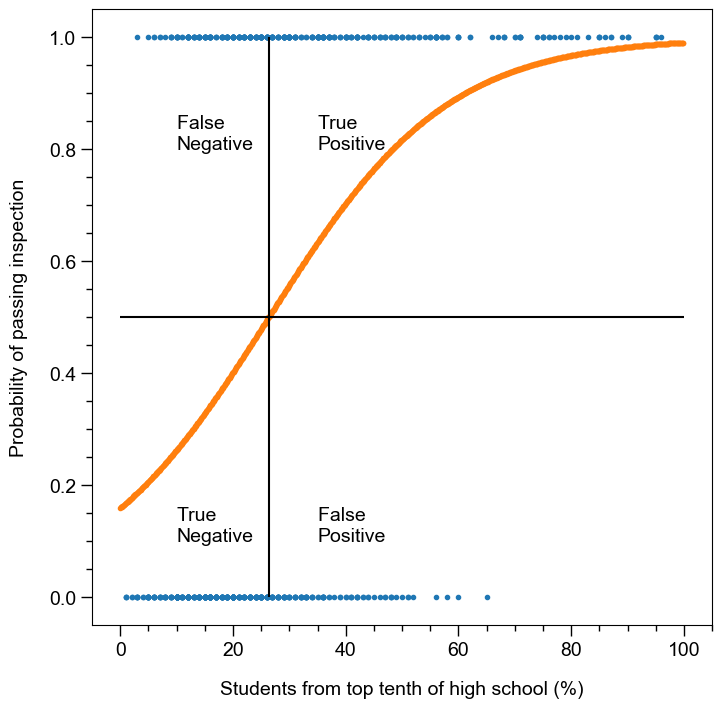

In [28]:
# Generate a list of numbers from 0 to 100 in steps of 0.1
z = np.arange(0, 100, 0.1)

# Run each value from z through function to find probability of assigning label 0 and 1
probs = logreg.predict_proba(pd.DataFrame(z))

# Extract the probabilities for assigning label 1
phi_z = probs[:, 1]

# Plot Top10perc against Passed_Inspection with sigmoid curve and lines to indicate p=0.5 and Top10perc=x_at_half_probability
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(college_clean.Top10perc, college_clean.Passed_Inspection, '.')
ax.plot(z, phi_z, '.')
ax.vlines(x_at_half_probability, ymin=0, ymax=1, color='black')
ax.hlines(0.5, xmin=0, xmax=100, color='black')
plt.text(10, 0.1, 'True \nNegative')
plt.text(35, 0.1, 'False \nPositive')
plt.text(10, 0.8, 'False \nNegative')
plt.text(35, 0.8, 'True \nPositive')
plt.xlabel('Students from top tenth of high school (%)')
plt.ylabel('Probability of passing inspection')
plt.show()

Note, you can only make this visualisation if there is one predictor.

Normally you would not go through this process but we have to demonstrate how logistic regression makes mistakes. Last module you may recall that we discussed type 1 and 2 errors (false positive and false negative). These happen with classification models as well. If you look at the visualisation above you can see four boxes made by the black lines:

<ul>
    <li> The points in the bottom left box are the colleges which are predicted to fail the inspection and actually failed (True Negative). </li>
    <li> The points in the top right box are the colleges which are predicted to pass the inspection and actually passed (True Positive). </li>
</ul>

The points in these two boxes have been predicted correctly, but what about the other two?

<ul>
    <li> The points in the bottom right box are the colleges which were predicted to pass the inspection, but actually failed (False Positive).</li>
    <li> The points in the top left box are the colleges which have been predicted to fail the inspection, but actually passed (False Negative).</li>
</ul>

The points in these boxes have been predicted incorrectly, and it is these errors we want to investigate. Is our model more likely to predict a false positive or false negative? One type of error could be a lot worse (depending on the context), so you will want to know what is going to happen.

The easiest way to check this is using something called a confusion matrix, which shows the same information as the visualisation above, but in a table.

# Confusion matrix


In [29]:
# This website helps you understand precision & recall using interactive visualizations
# https://mlu-explain.github.io/precision-recall/ 

In [30]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

Before we can build the matrix we will need to collect the predicted values and actual values from our model:

In [31]:
y_true = y_train # Would be much better to do cross-validation, at least after we do this...
y_pred = logreg.predict(X_train)

Now we can build the matrix:

In [32]:
pd.DataFrame(confusion_matrix(y_true,y_pred))
# Top Left is True Negative; Bottom Right is True Positive
# Top Right is False Positive -- predicted positive, but actually negative 
# Bottom Left is False Negative -- predicted negative, but actually positive

,0,1
0,238,74
1,128,180


Or if you want it to look a bit more visually appealing:

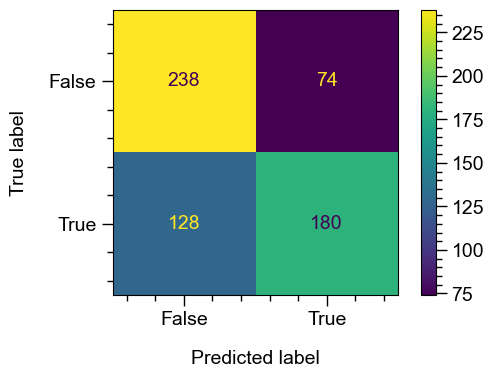

In [33]:
#plot_confusion_matrix(logreg, X_train,y_train); # Function plot_confusion_matrix is deprecated
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot();

In either case it shows us the same thing, in our model we have 180 true positives (1,1) and 238 true negatives (0,0). However there are also 74 False Positives and 128 False Negatives. We can see then that our model, based on percentage of students in the top tenth of their high school class, is more likely to predict a failed inspecion, i.e, there are more false negatives than false positives.

This method, however, still requires some work. It would be great if there were some metrics that can summarise this information for us...

There is!

Precision and recall. 

Precision evaluates how often a prediction is true. It is calculated by dividing the number of true positives by the sum of all positive predictions (false positive + true positive):

<p style=font-size:24pt>precision = $\frac{TP}{TP + FP}$</p> 

Recall evaluates how often a true value is predicted correctly. It is calculated by dividing the true positives by the sum of all actual positives (false negative + true positive):

<p style=font-size:24pt>recall = $\frac{TP}{TP + FN}$</p> 

In [34]:
from sklearn.metrics import precision_score, recall_score

#print('Precision: ' + str(precision_score(y_true,y_pred)))
#print('Recall: ' + str(recall_score(y_true,y_pred)))
print("-----------------------------------------------------------------------------------------")
print(f"Precision: The percentage of true positives out of all positive predictions is {100*precision_score(y_true, y_pred):.1f}%")
print(f"Recall: The percentage of true positives out of all actual positives is {100*recall_score(y_true, y_pred):.1f}%")

-----------------------------------------------------------------------------------------
Precision: The percentage of true positives out of all positive predictions is 70.9%
Recall: The percentage of true positives out of all actual positives is 58.4%


From the precision we can see that of all the colleges our model has predicted as passing (all positive predictions), 70.9% actually passed (true positives).

In other words, from the precision we can see that if our model has said a college will pass, we can be 70.9% confident this prediction is correct.

The recall tells us that for all colleges that really did pass (i.e. all the actual positives), 58.4% will be predicted correctly (i.e. are true positives).

There is a function called a classification report that will return the precision and recall for both labels, as well as an f1-score (the harmonic mean of precision and recall). This function also returns the accuracy score so you can see all the metrics in one place.

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

       False       0.65      0.76      0.70       312
        True       0.71      0.58      0.64       308

    accuracy                           0.67       620
   macro avg       0.68      0.67      0.67       620
weighted avg       0.68      0.67      0.67       620



Bonus: Why the harmonic mean? It punishes the precision and recall scores from being different to each other more than just taking the average of these two scores does.

In [36]:
# This website helps you understand ROC & ROC-AUC using interactive visualizations
# https://mlu-explain.github.io/roc-auc/

### AUC-ROC curve

A receiver operating characteristic curve (ROC curve) is a useful tool in our arsenal for evaluating our models. By default, the threshold for predicting a label is 0.5, but it doesn't have to be. A ROC curve will, for every threshold between 0 and 1, compare the true positive rate and true negative rate.

You have already met the true positive rate - it is the recall. The false positive rate is the recall for the negative label. When you plot these metrics against each other you get a curve, the further this curve stretches into the top left of the visualisation, the better your model is at prediction. If it forms a diagonal line it is not good for prediction at all:

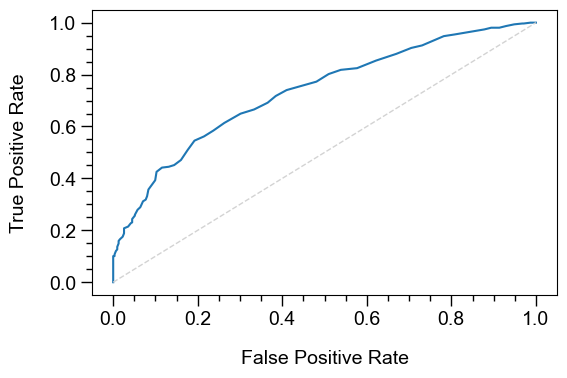

In [37]:
from sklearn.metrics import roc_curve

# Find the probabilities for each data point
y_pred_proba = logreg.predict_proba(X_train)[::,1]

# find false positive and true positive rate
fpr, tpr, thresholds = roc_curve(y_train,  y_pred_proba, drop_intermediate=False)

#create ROC curve
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# Plot a diagonal line
plt.plot([0, 1], [0, 1], color='lightgrey', lw=1, linestyle='--')
plt.show()

From this visualisation our model looks ok; we can get a more robust metric by calculating the area under the curve (AUC, hence AUC-ROC). The closer this is to 1, the better the model is at prediction:

In [38]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_train, y_pred_proba)
print(auc)

0.734172077922078


At 73.4% it shows our model is quite good for making predictions.

-----------------------------------------------------------------------------------------
Precision: The percentage of true positives out of all positive predictions is 68.8%
Recall: The percentage of true positives out of all actual positives is 57.1%
              precision    recall  f1-score   support

       False       0.64      0.75      0.69        79
        True       0.69      0.57      0.62        77

    accuracy                           0.66       156
   macro avg       0.66      0.66      0.66       156
weighted avg       0.66      0.66      0.66       156



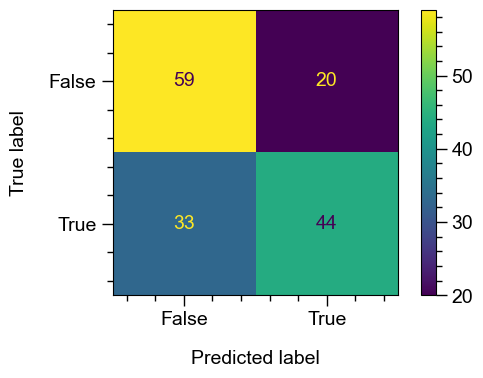

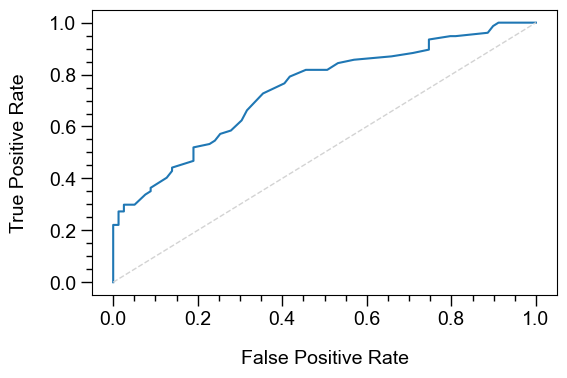

0.7407529179681078


In [39]:
# Now, we should really also do this on the test set...

y_true = y_test 
y_pred = logreg.predict(X_test)

pd.DataFrame(confusion_matrix(y_true,y_pred))
# Top Left is True Negative; Bottom Right is True Positive
# Top Right is False Positive -- predicted positive, but actually negative 
# Bottom Left is False Negative -- predicted negative, but actually positive

# Display Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot();

print("-----------------------------------------------------------------------------------------")
print(f"Precision: The percentage of true positives out of all positive predictions is {100*precision_score(y_true,y_pred):.1f}%")
print(f"Recall: The percentage of true positives out of all actual positives is {100*recall_score(y_true,y_pred):.1f}%")
print(classification_report(y_true,y_pred))

# Find the probabilities for each data point
y_pred_proba = logreg.predict_proba(X_test)[::,1]

# find false positive and true positive rate
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba, drop_intermediate=False)

#create ROC curve
plt.figure()
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# Plot a diagonal line
plt.plot([0, 1], [0, 1], color='lightgrey', lw=1, linestyle='--')
plt.show()

auc = roc_auc_score(y_test, y_pred_proba)
print(auc)

In [40]:
# Very similar metrics. Great!

## Practice

For the predictive model you built:

<ol>
    <li> Calculate the accuracy score for both the training and test data and compare it to the baseline accuracy</li>
    <li> Plot a confusion matrix </li>
    <li> Print a classification report and check the precision and recall </li>
    <li> Plot an AUC-ROC curve and calculate the area under the curve </li>
    <li> Interpret these scores and determine which model is the most accurate </li>
</ol>

training accuracy: 0.671
testing accuracy: 0.647
baseline accuracy: 0.504


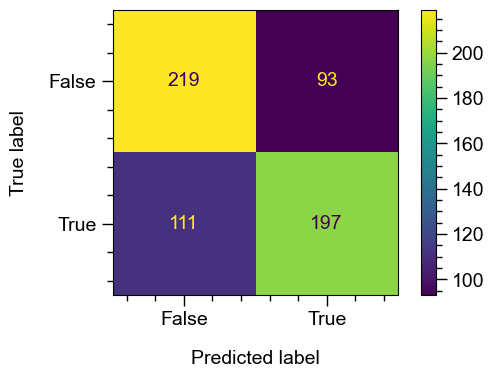

Precision: 0.68
Recall: 0.64
              precision    recall  f1-score   support

       False       0.66      0.70      0.68       312
        True       0.68      0.64      0.66       308

    accuracy                           0.67       620
   macro avg       0.67      0.67      0.67       620
weighted avg       0.67      0.67      0.67       620



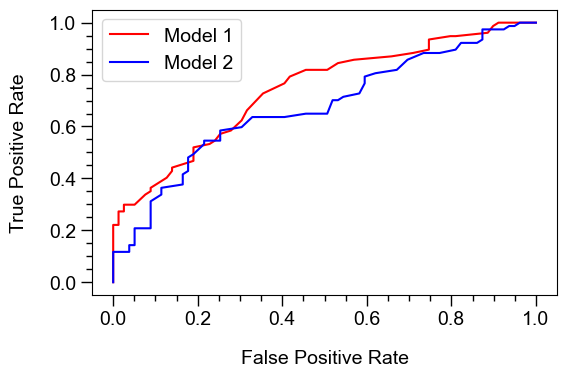

0.7407529179681078
0.6747493013315797


In [41]:
college_clean = pd.read_csv('college_clean.csv')

# If you use the following predictor, you will see perfect prediction.
# This is because I used Grad.Rate to created the Passed_Inspection column
# features = ['Grad.Rate']  

features = ['Top25perc']

X2 = college_clean[features]
y = college_clean.Passed_Inspection

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, stratify=y, train_size=0.8, random_state=42)

logreg2 = LogisticRegression().fit(X_train2, y_train2)

print(f'training accuracy: {logreg2.score(X_train2,y_train2):.3f}')
print(f'testing accuracy: {logreg2.score(X_test2,y_test2):.3f}')
print(f'baseline accuracy: {college_clean.Passed_Inspection.value_counts(normalize=True).max():.3f}')

y_true2 = y_train2
y_pred2 = logreg2.predict(X_train2)

#plot_confusion_matrix(logreg, X_train,y_train); # Function plot_confusion_matrix is deprecated
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true2, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg2.classes_)
disp.plot()
plt.show()

print(f'Precision: {precision_score(y_true2,y_pred2):.2f}')
print(f'Recall: {recall_score(y_true2,y_pred2):.2f}')

print(classification_report(y_true2,y_pred2))

from sklearn.metrics import roc_curve

# Find the probabilities for each data point
y_pred_proba2 = logreg2.predict_proba(X_test2)[::,1]

# find false positive and true positive rate
fpr2, tpr2, thresholds2 = roc_curve(y_test2,  y_pred_proba2, drop_intermediate=False)

#create ROC curve
plt.plot(fpr, tpr, color='red', label='Model 1')
plt.plot(fpr2, tpr2, color='blue', label='Model 2')

plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()

plt.show()

auc = roc_auc_score(y_test, y_pred_proba)
print(auc)

auc2 = roc_auc_score(y_test2, y_pred_proba2)
print(auc2)

### [Stretch] Finding the optimal threshold

An advantage AUC-ROC of curves is that they can help us understand what the optimal threshold is for minimising false positives or negatives. You don't have to leave the threshold for assigning a label at 0.5, you can change it to reduce one of the two errors. But how do you know which threshold to choose?

It's actually quite simple to work out. Earlier we calculated a list of true positive rates (tpr) and false positive rates (fpr) for all thresholds. To find the threshold which optimises the true positive rate (minimises false positives) we just need to find the largest difference between the true positive and false positive rates. To optimise the false positive rate you find the smallest difference.

In [42]:
tpr_minus_fpr = (tpr-fpr)
tpr_minus_fpr

array([0.        , 0.02597403, 0.05194805, 0.06493506, 0.07792208,
       0.09090909, 0.1038961 , 0.16883117, 0.18181818, 0.19480519,
       0.22077922, 0.20812099, 0.22110801, 0.26006904, 0.24741082,
       0.27338484, 0.24806839, 0.26171297, 0.26204176, 0.27502877,
       0.27535755, 0.27601512, 0.28933092, 0.30231794, 0.28998849,
       0.27765905, 0.29064606, 0.3296071 , 0.30461943, 0.30494822,
       0.31826401, 0.30593457, 0.31957916, 0.34588197, 0.37284235,
       0.36117048, 0.37448627, 0.36248562, 0.3118527 , 0.31251027,
       0.2875226 , 0.21190202, 0.17425612, 0.14926845, 0.18822949,
       0.15058359, 0.13792537, 0.07496301, 0.08827881, 0.08860759,
       0.07594937, 0.02531646, 0.01265823, 0.        ])

In [43]:
best_tp = tpr_minus_fpr.max()
print(best_tp)

0.37448627322045047


In [44]:
import numpy as np
best_index = np.where(tpr_minus_fpr == best_tp)

In [45]:
best_threshold = thresholds[best_index][0]
best_threshold

0.41658418675194653

To optimise our model we need to set the threshold to 0.542. This means that if our model says the probability of a college being above average is greater than 54.2% we should assign the positive label. It is easy to do this:

In [46]:
# For each data point return the probability of predicting the positive label
y_pred_proba = logreg.predict_proba(X_test)[::,1]

# If this value is greater than best_threshold (0.542) assign 1, else 0
new_preds = np.array(y_pred_proba >= best_threshold).astype(int)

Using this we can now recalculate the precision, recall and accuracy and see if it has been improved:

In [47]:
pd.DataFrame(confusion_matrix(y_true,new_preds))
# Top Left is True Negative; Bottom Right is True Positive
# Top Right is False Positive -- predicted positive, but actually negative 
# Bottom Left is False Negative -- predicted negative, but actually positive

,0,1
0,46,33
1,16,61


Comparing this to our previous confusion matrix:

In [48]:
pd.DataFrame(confusion_matrix(y_true,y_pred))
# Top Left is True Negative; Bottom Right is True Positive
# Top Right is False Positive -- predicted positive, but actually negative 
# Bottom Left is False Negative -- predicted negative, but actually positive

,0,1
0,59,20
1,33,44


We can see there has been a small reduction in false positives and increase in true negatives but at a cost of more false negatives and fewer true positives. This means our model is now better at predicting fails. 

Let's check the metrics:

In [49]:
print('Optimal threshold')
print(classification_report(y_true,new_preds))
print('Threshold=0.5')
print(classification_report(y_true,y_pred))

Optimal threshold
              precision    recall  f1-score   support

       False       0.74      0.58      0.65        79
        True       0.65      0.79      0.71        77

    accuracy                           0.69       156
   macro avg       0.70      0.69      0.68       156
weighted avg       0.70      0.69      0.68       156

Threshold=0.5
              precision    recall  f1-score   support

       False       0.64      0.75      0.69        79
        True       0.69      0.57      0.62        77

    accuracy                           0.66       156
   macro avg       0.66      0.66      0.66       156
weighted avg       0.66      0.66      0.66       156



What we have done is optimised the threshold for predicting below average colleges correctly, with the recall now being 81%. This means that 81% of colleges failing inspection will be labelled correctly. The cost of this is that the precision has dropped, meaning that we are less confident that a fail prediction is actually correct.

On the flipside, we can be more confident that a label of pass is correct, but we're capturing fewer of them.

Finding the best model is a complicated fine tuning process; this is on top of comparing to other models which are using different combinations of features as well. You should only use this process once you have decided upon your best model and then fine tune it.

The reason we would want to do this is to minimise one of the two errors. Depending on the context one type of error can be far worse than the other. Consider an algorithm that tries to predict if a tumor is malignant, what would be worse - a false positive or false negative?

A false positive means a tumor is identified as malignant when it isn't, but this would be dealt with in a future round of testing. A false negative on the other hand would mean a malignant tumor has not been identified. The patient would leave thinking they were fine when they weren't and not get the treatment they need. A false negative in this case is far worse, so it would make sense to amend the threshold to reduce the likelihood, even though it would likely result in more false positives.

Amending a threshold to avoid a type of error is an ethical issue as you are potentially tampering with the output of a model. If you decide to do this it needs to be justified in the context of the situation, identifying why one type of error is worse than the other.

# Practice

A financial advisor is investigating what will most greatly affect the chances of someone having a loan approved. 

Clean and prepare the data below to build a model that will predict if a loan is approved. Evaluate and interpret the model to explain to a non-technical stakeholder what most affects loan approvals, and how reliable your model is.

<a href='https://www.kaggle.com/datasets/vikasukani/loan-eligible-dataset'>Documentation.</a>

In [50]:
loan_df = pd.read_csv('loans.csv')
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [51]:
loan_df.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [52]:
loan_df = loan_df.dropna()
loan_df.duplicated().sum()

0

In [53]:
# loan_df['Loan_Status']=loan_df.Loan_Status.apply(lambda x: 1 if x=='Y' else 0)
loan_df['Loan_Status'] = (loan_df.Loan_Status == 'Y').astype(int)  # Avoid using .apply() if you can

In [54]:
loan_dummies = pd.get_dummies(loan_df, columns=['Gender','Dependents','Married','Education','Self_Employed','Property_Area','Credit_History'], drop_first=True)

In [55]:
loan_dummies.columns

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Loan_Status', 'Gender_Male', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Credit_History_1.0'],
      dtype='object')

In [56]:
X = loan_dummies.drop(['Loan_ID'], axis=1)
y = X.pop('Loan_Status') 
# The code removes the 'Loan_Status' column from X using the pop() method and assigns it to the variable y. 
# This separates the target variable from the features in X. 

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.8, random_state=1)
logreg = LogisticRegression(max_iter=1000, random_state=1)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [58]:
# create a list of dictionaries containing the data
data = []
for index, coeff in enumerate(logreg.coef_[0]):
    data.append({'coeff': coeff, 'odds = exp_coeff': np.exp(coeff), 'column_name': X_train.columns[index]})

# create the DataFrame
df = pd.DataFrame(data).sort_values(by='odds = exp_coeff', ascending=False).reset_index(drop=True)

# display the DataFrame
display(df)

,coeff,odds = exp_coeff,column_name
0,2.596244,13.413269,Credit_History_1.0
1,0.852282,2.344991,Property_Area_Semiurban
2,0.529204,1.697581,Married_Yes
3,0.293366,1.340933,Gender_Male
4,0.138809,1.148904,Dependents_3+
5,0.061794,1.063744,Dependents_2
6,-0.000005,0.999995,ApplicantIncome
7,-0.000051,0.999949,CoapplicantIncome
8,-0.003572,0.996435,LoanAmount
9,-0.004218,0.995791,Loan_Amount_Term


In [59]:
# Because of the nonlinear relationship between odds and probability, I don't recommend converting to probability here.

In [60]:
# Having a credit history which meets guidelines multiplies your odds of predicted approval by 13.
# Having your property in a semiurban area multiplies your odds of predicted approval by 2.3.
# Being married multiplies your odds of predicted approval by 1.7.
# Being male multiplies your odds of predicted approval by 1.3.
# Having dependents multiplies your odds of predicted approval by 1.1. 

# Not being a graduate multiplies your odds of predicted approval by 0.7. (i.e. it decreases your odds)

In [61]:
effect_df = df[['column_name', 'odds = exp_coeff']].copy()
effect_df= effect_df.set_index('column_name')

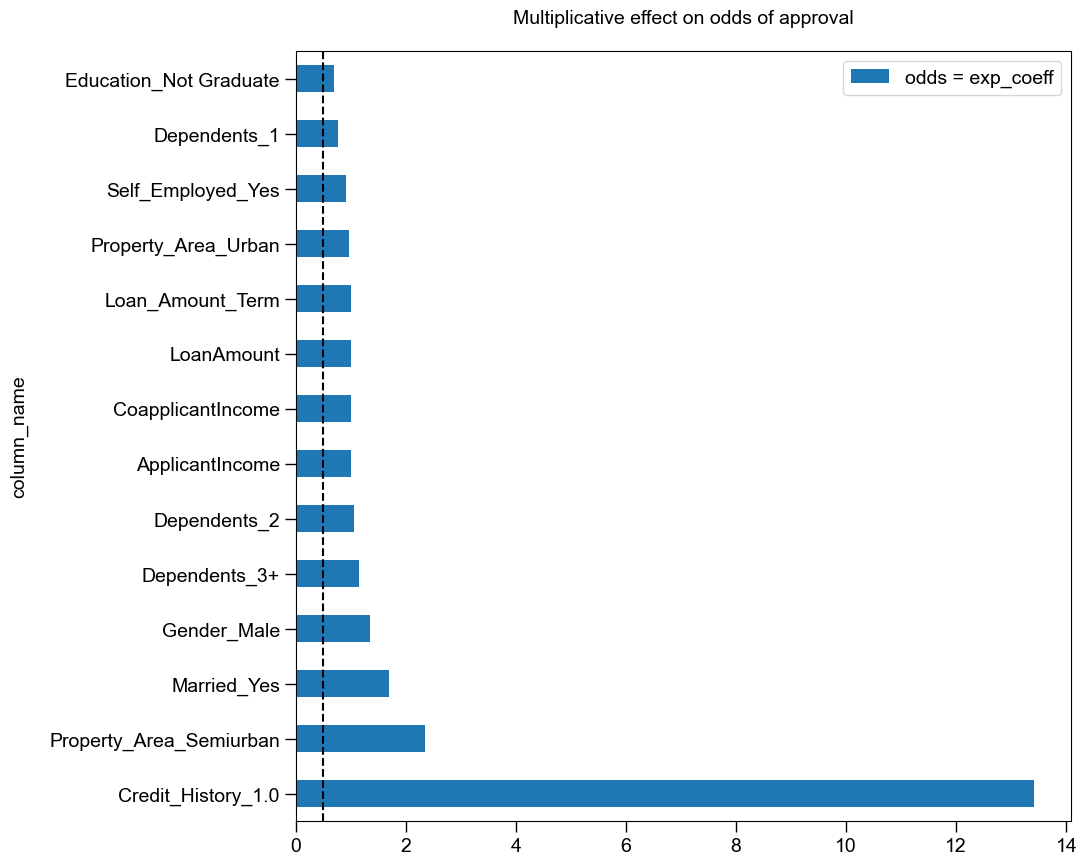

In [62]:
#display(effect_df)
fig, ax = plt.subplots(figsize=(10, 10))
# plot the horizontal bar chart on the axis object
effect_df.plot(kind='barh', ax=ax)
# Remove minor ticks from the plot
plt.title("Multiplicative effect on odds of approval")
plt.axvline(x=0.5, color='k', linestyle='--')
plt.minorticks_off()
plt.show()

In [63]:
print(f'Train Score: {logreg.score(X_train,y_train):.3f}')
print(f'Test Score: {logreg.score(X_test,y_test):.3f}')
print(f'Baseline Score: {loan_df.Loan_Status.value_counts(normalize=True).max():.3f}')

Train Score: 0.807
Test Score: 0.844
Baseline Score: 0.692


In [64]:
print(f"This model is accurately predicting approval at a rate of {100*logreg.score(X_train,y_train):.1f}% (against a baseline of {100*loan_df.Loan_Status.value_counts(normalize=True).max():.1f}%).")

This model is accurately predicting approval at a rate of 80.7% (against a baseline of 69.2%).


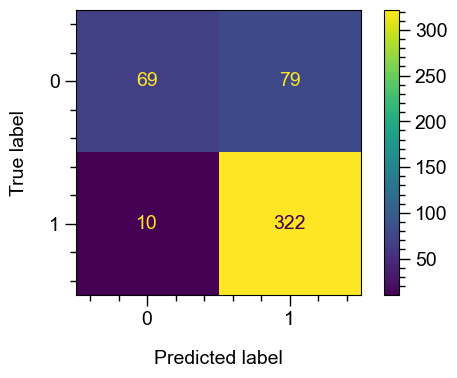

In [65]:
plot_confusion_matrix(logreg, X, y);

This model is most likely to get its predictions correct (80%) but if it is going to make an error, it is far more likely to predict someone getting approved when they shouldn't.

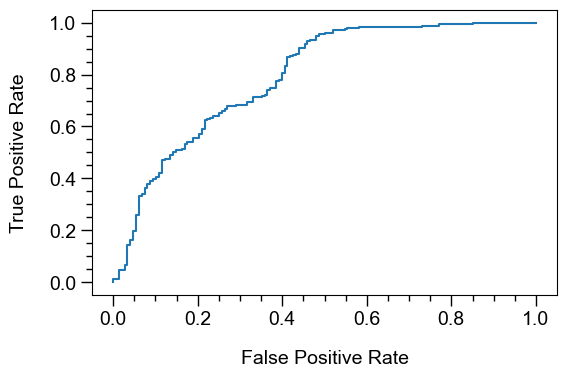

In [66]:
from sklearn.metrics import roc_curve

# Find the probabilities for each data point
y_pred_proba = logreg.predict_proba(X)[::,1]

# find false positive and true positive rate
fpr, tpr, _ = roc_curve(y,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [67]:
auc = roc_auc_score(y, y_pred_proba)
print(auc)

0.7913546076196678


In [68]:
print(f"At {100*auc:.1f}%, this model is fairly good at making predictions.")

At 79.1%, this model is fairly good at making predictions.
